In [2]:
# Libraries
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
# https://uci-genpals.github.io/integration/2020/12/03/scanorama_demo_pancreas.html

In [5]:
import os
os.chdir('/Users/judepops/Documents/Untitled Folder') 


In [3]:
# Import the adata
pan = sc.read_h5ad('Panh5.h5ad')
fernandes = sc.read_h5ad('fernandesh5.h5ad')
alsaigh = sc.read_h5ad('alsaighh5.h5ad')


In [4]:
import scanorama


In [27]:
adata = sc.read_h5ad('Pan_Fern_Als.h5ad')

/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [28]:
adata

AnnData object with n_obs × n_vars = 58364 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent', 'RNA_snn_res.0.8', 'seurat_clusters', 'Source', 'RNA_snn_res.0.5'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [6]:
target_genes = 2000
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=target_genes, batch_key='Source')


In [7]:
subset = adata[:, adata.var["highly_variable"]]

# we have 2000 HVGs

In [8]:
subset

View of AnnData object with n_obs × n_vars = 58364 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent', 'RNA_snn_res.0.8', 'seurat_clusters', 'Source', 'RNA_snn_res.0.5'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'neighbors', 'hvg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [9]:
adata = adata[:, adata.var["highly_variable"]] 

In [10]:
adata

View of AnnData object with n_obs × n_vars = 58364 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent', 'RNA_snn_res.0.8', 'seurat_clusters', 'Source', 'RNA_snn_res.0.5'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'neighbors', 'hvg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/judepops/opt/anaconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


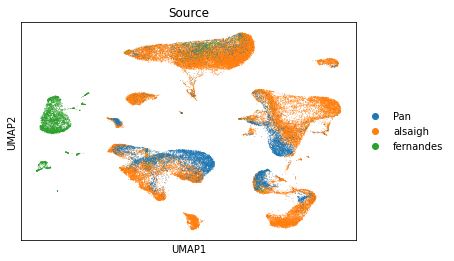

In [11]:
sc.pl.umap(adata, color=['Source']) # We plot the cell types as well, since it's been already processed.


In [12]:
adata_split  = []

for Source in adata.obs['Source'].unique():
    adata_split.append(adata[adata.obs['Source']==Source].copy())

In [13]:
corrected = scanorama.correct_scanpy(adata_split, return_dimred=True)


Found 2000 genes among all datasets
[[0.         0.20840734 0.72303307]
 [0.         0.         0.13033067]
 [0.         0.         0.        ]]
Processing datasets (0, 2)
Processing datasets (0, 1)
Processing datasets (1, 2)


/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])


In [14]:
adata_corrected = corrected[0].concatenate(corrected[1:])
adata_corrected.obs_names_make_unique(join='_')

/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [15]:
sc.pp.neighbors(adata_corrected, use_rep='X_scanorama')
sc.tl.umap(adata_corrected)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


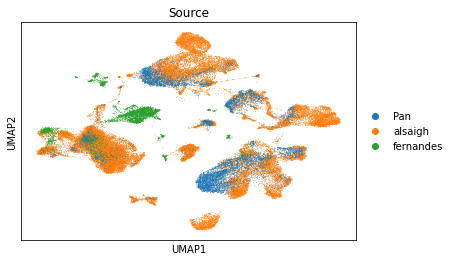

In [21]:
sc.pl.umap(adata_corrected, color=['Source'])

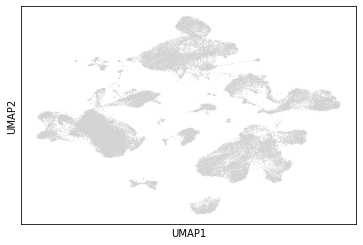

In [22]:
sc.pl.umap(adata_corrected)

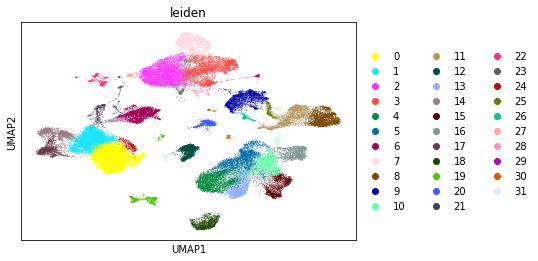

In [23]:
# Running leiden clustering on the scanorama dataframe
sc.tl.leiden(adata_corrected, resolution = 1)
sc.pl.umap(adata_corrected, color=['leiden'])

In [10]:
# Saving scanorama integrated dataframe
from anndata import AnnData
AnnData.write_h5ad(adata_corrected, filename='Scanorama_Integration2.h5ad')

NameError: name 'adata_corrected' is not defined

In [26]:
adata_corrected.obs.to_csv('scanorama2.csv')


In [29]:
# Running Knn (louvain) clustering on scanorama object
adata_corrected = sc.read_h5ad('Scanorama_Integration2.h5ad')

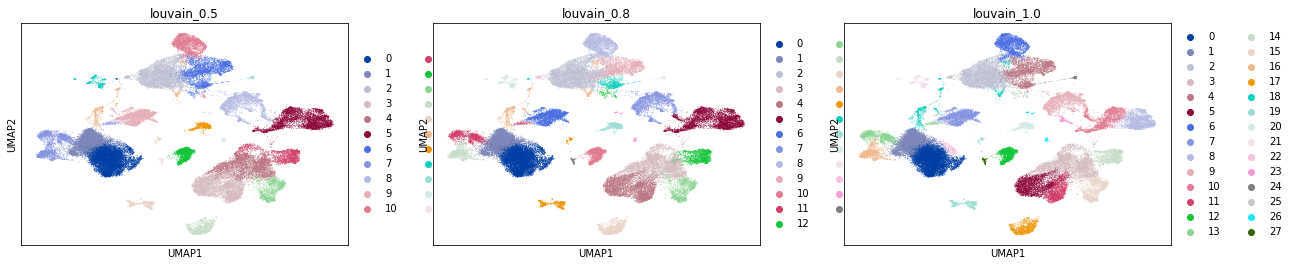

In [32]:
sc.tl.louvain(adata_corrected, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata_corrected, resolution = 0.8, key_added = "louvain_0.8")
sc.tl.louvain(adata_corrected, resolution = 0.5, key_added = "louvain_0.5")

sc.pl.umap(adata_corrected, color=['louvain_0.5', 'louvain_0.8', 'louvain_1.0'])

In [33]:
adata_corrected.obs.to_csv('scanorama2.csv')


In [35]:
AnnData.write_h5ad(adata_corrected, filename='Scanorama_Integration3.h5ad')

In [36]:
adata_corrected.obs.to_csv('scanorama3.csv')


In [6]:
scanorama = sc.read_h5ad('Scanorama_Integration3.h5ad')

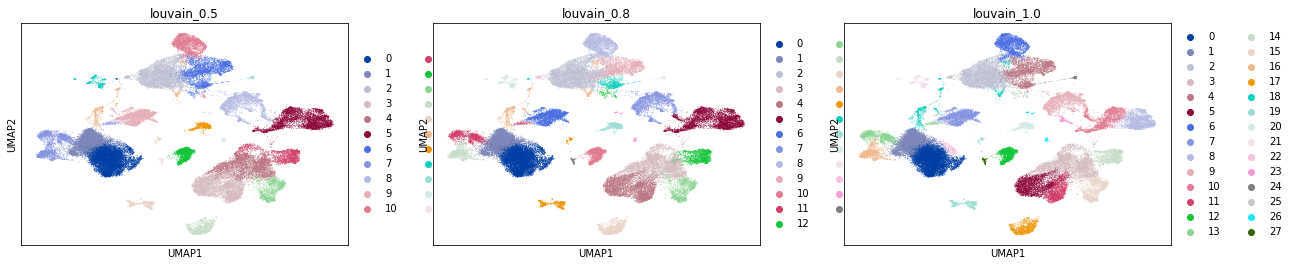

In [7]:
sc.pl.umap(scanorama, color=['louvain_0.5', 'louvain_0.8', 'louvain_1.0'])

In [8]:
import os
os.chdir('/Users/judepops/Documents/DISSERTATION/Integrating') 

In [11]:
AnnData.write_h5ad(scanorama, filename='Scanorama_Integrated.h5ad')